### $\color{royalblue}{\text{Седма вјежба из нумеричких метода у астрономији, датум: 29.01.2026.}} $

#### $\color{magenta}{\text{Нумеричка интеграција диференцијалних једначина.}} $ 

Рјешавање диференцијалних једначина $\dot{y}=f(t,y)$ захтијева проналажење функције $y(t)$ што је еквивалентно са:

$$
y(t)=y(t_0)+\int_{t_0}^tf(s,y(s))ds.
$$

Нумеричком интеграцијом се овај интеграл апроксимира на дискретан начин, различитим методама.

Непрекидну функцију $f(x)$ је, према Вајерштрасовој теореми, могуће апроксимирати нпр. Тејлоровим развојем:

$$
\color{red}{f(x+\Delta x)\approx f(x)+\Delta xf'(x)'}\color{black}{+\frac{1}{2}(\Delta x)^2f''(x)+...}
$$

$$
\color{red}{f'(x+\Delta x)\approx f'(x)+\Delta xf''(x)'}\color{black}{+\frac{1}{2}(\Delta x)^2f^{(3)}(x)+...}
$$

Ако је $\Delta x$ довољно мало, доприноси *виших* извода су занемарљиви. Уколико је $f(x)$ нпр. положај, а $f'(x)$ брзина, 

слиједи да је познавањем положаја, брзине и убрзања у неком тренутку, могуће израчунати положај и брзину у

неком будућем тренутку. Тачност зависи од величине корака $\Delta x$, које је јако важно и за трајање интеграције.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

Потребне су нам *конверзионе* функције, ради лакшег рађења задатака.

In [24]:
def year2second(x): # конверзија година у секунде
    return x*31557600.0

def day2second(x): # конверзија дана у секунде 
    return x*86400

def second2day(x): # конверзија секунда у дане
    return x/86400

def second2year(x): # конверзија секунда у године
    return x/31557600.0

def au2m(x): # конверзија астрономских јединица у метре
    return x*au

def m2au(x): # конверзија метара у астрономске јединице
    return x/au

gm = 1.32712440018e20 # гравитациона константа * маса Сунца
au = 149597870700. # астрономска јединица [m]


Генерално, желимо да ријешимо тзв. ограничени проблем три тијела (треће тијело је "тест честица" занемарљиве масе).

*Планетоцентрични* радијус вектор је дат као:

$$
\vec{r}_{pc} = \vec{r} - \vec{r}_p = (x - x_p,\,y - y_p,\ z - z_p),
$$

$$
r = \sqrt{x^2 + y^2 + z^2},
$$

$$
r_{pc} = \sqrt{(x - x_p)^2 + (y - y_p)^2 + (z - z_p)^2}.
$$

Убрзање је дато преко:

$$
\vec{a} = -G\left(\frac{M_s}{r^3}\vec{r} + \frac{M_p}{r_{pc}^3}\vec{r}_{pc}\right),
$$

са компонентама:

$$
a_x = -G\left(\frac{M_s x}{r^3} + \frac{M_p (x - x_p)}{r_{pc}^3}\right),
$$

$$
a_y = -G\left(\frac{M_s y}{r^3} + \frac{M_p (y - y_p)}{r_{pc}^3}\right),
$$  

$$
a_z = -G\left(\frac{M_s z}{r^3} + \frac{M_p (z - z_p)}{r_{pc}^3}\right).
$$

Испод пишемо функцију за рачунање убрзања у проблему три тијела.

In [25]:
def ubrzanje_3tijela(x ,y, z, xp, yp, zp, Ms, Mp, gama):
    
    # x, y, z - хелиоцентричне координате објекта
    # xp, yp, zp - хелиоцентричне координате планете
    # Ms - маса Сунца
    # Mp - маса планете
    # gama - гравитациона константа
    
    x_pc = x - xp
    y_pc = y - yp
    z_pc = z - zp
    
    r = (x**2 + y**2 + z**2)**(1/2) # хелиоцентрични радијус вектор објекта
    r_pc = (x_pc**2 + y_pc**2 + z_pc**2)**(1/2) # планетоцентрични радијус вектор објекта


    ax = -gama * (Ms / r**3 * x + Mp / r_pc**3 * x_pc)
    ay = -gama * (Ms / r**3 * y + Mp / r_pc**3 * y_pc)
    az = -gama * (Ms / r**3 * z + Mp / r_pc**3 * z_pc)
    
    return ax, ay, az


#### $\color{magenta}{\text{Ојлерова метода.}} $ 

Ради једноставности, **прво рјешавамо проблем два тијела**. Суштина Ојлерове методе је у двије једначине испод.

$$
\color{red}{\vec{r}(t+\Delta t) \approx \vec{r} + \Delta t\cdot\vec{v}}\color{black}{,}
$$
$$
\color{red}{\vec{v}(t+\Delta t) \approx \vec{v} + \Delta t\cdot\vec{a}}\color{black}{.}
$$

Расписивањем по компонентама слиједи:
$$
x(t+\Delta t) = x(t) + \Delta t \cdot v_x(t),
$$
$$
y(t+\Delta t) = y(t) + \Delta t \cdot v_y(t),
$$
$$
z(t+\Delta t) = z(t) + \Delta t \cdot v_z(t),
$$

$$
v_x(t+\Delta t) = v_x(t) + \Delta t \cdot a_x(t),
$$s

$$
v_y(t+\Delta t) = v_y(t) + \Delta t \cdot a_y(t),
$$

$$
v_z(t+\Delta t) = v_z(t) + \Delta t \cdot a_z(t).
$$

гдје су компоненте убрзања дате као:

$$
a_x = -\frac{GM_{\odot}x}{r^3}, \quad a_y = -\frac{GM_{\odot}y}{r^3}, \quad a_z = -\frac{GM_{\odot}z}{r^3}.
$$


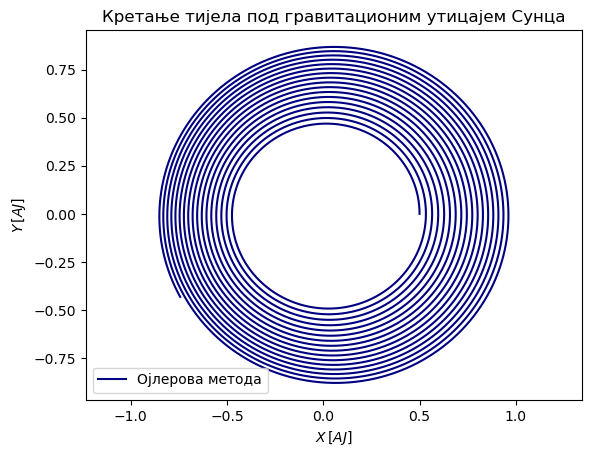

In [26]:
x = [au2m(0.5)] # почетни положај
y = [0]
z = [0]

vx = [0] # почетна брзина [m/s]
vy = [4e4] 
vz = [1e4]

t = year2second(10) # параметри интеграције
dt = day2second(0.1)

tt = 0

while tt < t:
    
    r = np.sqrt(x[-1]**2 + y[-1]**2 + z[-1]**2) # тренутно хелиоцентрично растојање
    
    # компоненте убрзања
    ax = -gm/r**3 * x[-1]
    ay = -gm/r**3 * y[-1]
    az = -gm/r**3 * z[-1]
    
    # координате
    x.append(x[-1] + vx[-1] * dt)
    y.append(y[-1] + vy[-1] * dt)
    z.append(z[-1] + vz[-1] * dt)
    
    # бзрине
    vx.append(vx[-1] + ax * dt)
    vy.append(vy[-1] + ay * dt)
    vz.append(vz[-1] + az * dt)
    
    # вријеме
    tt = tt + dt
    
plt.plot(m2au(np.array(x)), m2au(np.array(y)), color='navy', label='Ојлерова метода')
plt.axis('equal')
plt.xlabel(r'$X\,[AJ]$')
plt.ylabel(r'$Y\,[AJ]$')
plt.title('Кретање тијела под гравитационим утицајем Сунца')
plt.legend()
plt.show()

#### $\color{magenta}{\text{Ојлеров-Кромерова метода.}} $ 

Ојлер-Кромерова метода је алтернативни начин рјешавања проблема два/три тијела. Разлика у односу на Ојлерову

методу је у томе што се прво ажурира брзина, па онда положај. Метода је описана сљедећим једначинама:

$$
\color{red}{\vec{v}(t + \Delta t) \approx \vec{v} + \Delta t \cdot \vec{a}}\color{black}{,}
$$

$$
\color{red}{\vec{r}(t + \Delta t) \approx \vec{r} + \Delta t \cdot \vec{v}(t + \Delta t)}\color{black}{.}
$$

Расписивањем по компонентама слиједи:

$$v_x(t + \Delta t) = v_x(t) + \Delta t \cdot a_x(t),$$
$$v_y(t + \Delta t) = v_y(t) + \Delta t \cdot a_y(t),$$
$$v_z(t + \Delta t) = v_z(t) + \Delta t \cdot a_z(t),$$

$$x(t + \Delta t) = x(t) + \Delta t \cdot v_x(t + \Delta t),$$
$$y(t + \Delta t) = y(t) + \Delta t \cdot v_y(t + \Delta t),$$
$$z(t + \Delta t) = z(t) + \Delta t \cdot v_z(t + \Delta t).$$

Главна предност Ојлер-Кромерове у односу на Ојлерову је у томе што је боља у очувању енергије.

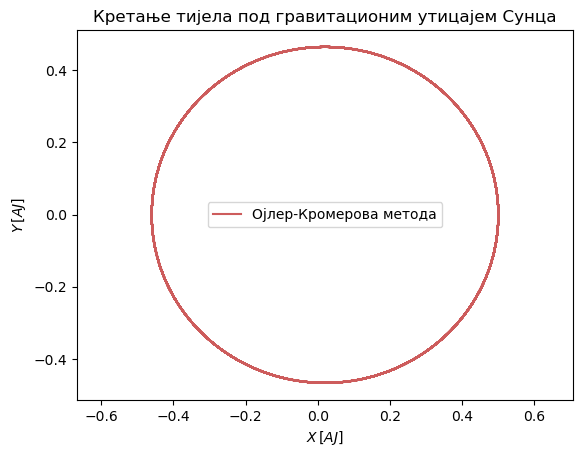

In [27]:
x = [au2m(0.5)] # почетни положај
y = [0]
z = [0]

vx = [0] # почетна брзина
vy = [4e4]
vz = [1e4]

tt = 0

t = year2second(10) # параметри интеграције
dt = day2second(0.1)

while tt<t:
    
    r = np.sqrt(x[-1]**2 + y[-1]**2 + z[-1]**2) # тренутно хелиоцентрично растојање
    
    # компоненте убрзања
    ax = -gm/r**3 * x[-1]
    ay = - gm/r**3 * y[-1]
    az = - gm/r**3 * z[-1]
    
    # брзине
    vx.append(vx[-1] + ax * dt)
    vy.append(vy[-1] + ay * dt)
    vz.append(vz[-1] + az * dt)
    
    # координате
    x.append(x[-1] + vx[-1] * dt)
    y.append(y[-1] + vy[-1] * dt)
    z.append(z[-1] + vz[-1] * dt)
    
    # вријеме
    tt = tt+dt
    
plt.plot(m2au(np.array(x)), m2au(np.array(y)), color='indianred', label='Ојлер-Кромерова метода')
plt.axis('equal')
plt.xlabel(r'$X\,[AJ]$')
plt.ylabel(r'$Y\,[AJ]$')
plt.title('Кретање тијела под гравитационим утицајем Сунца')
plt.legend()
plt.show()

---

Прелазимо на сложенији случај - **рјешавање ограниченог проблема три тијела**. Прецизније, симулирамо путању тијела

занемарљиве масе под утицајем Сунца и Земље. Геоцентричне координате ($x_{gc},y_{gc},z_{gc}$) служе за праћење положаја у односу

на Земљу, а хелиоцентричне у односу на Сунце ($x_{hc},y_{hc},z_{hc}$).



In [28]:
Ms = 1.989e30 # маса Сунца [kg]
Mz = 5.972e24 # маса Земље [kg]
gama = 6.67e-11 # гравитациона константа [Nm²/kg²]
r0z = 6.378e6  # полупречник Земље [m]
v_zemlja = 2 * np.pi * au2m(1.) / (365.25 * 86400) # орбитална брзина Земље [m/s]
print('Орбитална брзина Земље:', v_zemlja, 'm/s')
v0 = 1e3 # почетна брзина у односу на Земљу

x_hc = [au2m(1.) + 50 * r0z] # 50 Земљиних полупречника
y_hc = [0]
z_hc = [0]
vx_hc = 0.25 * v0
vy_hc = v_zemlja + v0 
vz_hc = 0.5 * v0

print('Хелиоцентрична x компонента положаја:' , x_hc[0], 'm')

Орбитална брзина Земље: 29785.25436559154 m/s
Хелиоцентрична x компонента положаја: 149916770700.0 m


In [29]:
start = time.time()

xz = au2m(1) # координате Земље
yz = 0
zz = 0

sk = 2 * np.pi / year2second(1) # угаона брзина кретања Земље око Сунца

x_gc = [x_hc[0] - xz] # геоцентричне координате објекта
y_gc = [y_hc[0] - yz]
z_gc = [z_hc[0] - zz]

dt = day2second(1/24/6) # корак интеграције
t = 0 # почетни временски тренутак

while t < year2second(1): 

    r_hc = (x_hc[-1] ** 2 + y_hc[-1] ** 2 + z_hc[-1] ** 2)**(1/2)
    r_gc = (x_gc[-1] ** 2 + y_gc[-1] ** 2 + z_gc[-1] ** 2)**(1/2)

    ax = -gama * (Ms / r_hc**3 * x_hc[-1] + Mz / r_gc**3 * x_gc[-1])
    ay = -gama * (Ms / r_hc**3 * y_hc[-1] + Mz / r_gc**3 * y_gc[-1])
    az = -gama * (Ms / r_hc**3 * z_hc[-1] + Mz / r_gc**3 * z_gc[-1])

    vx_hc += ax * dt
    vy_hc += ay * dt
    vz_hc += az * dt

    x_hc.append(x_hc[-1] + vx_hc * dt)
    y_hc.append(y_hc[-1] + vy_hc * dt)
    z_hc.append(z_hc[-1] + vz_hc * dt)

    lz = t * sk  # лонгитуда 

    # правоугле координате 
    xz = au2m(1.) * np.cos(lz)
    yz = au2m(1.) * np.sin(lz)

    x_gc.append(x_hc[-1] - xz)
    y_gc.append(y_hc[-1] - yz)
    z_gc.append(z_hc[-1] - zz)
    
    t += dt

x_hc = np.array(x_hc)
y_hc = np.array(y_hc)
z_hc = np.array(z_hc)

x_gc = np.array(x_gc)
y_gc = np.array(y_gc)
z_gc = np.array(z_gc)

end = time.time()
print(f'Вријеме интеграције за Ојлер-Кромерову методу: {end - start:.2f} s.')

Вријеме интеграције за Ојлер-Кромерову методу: 0.48 s.


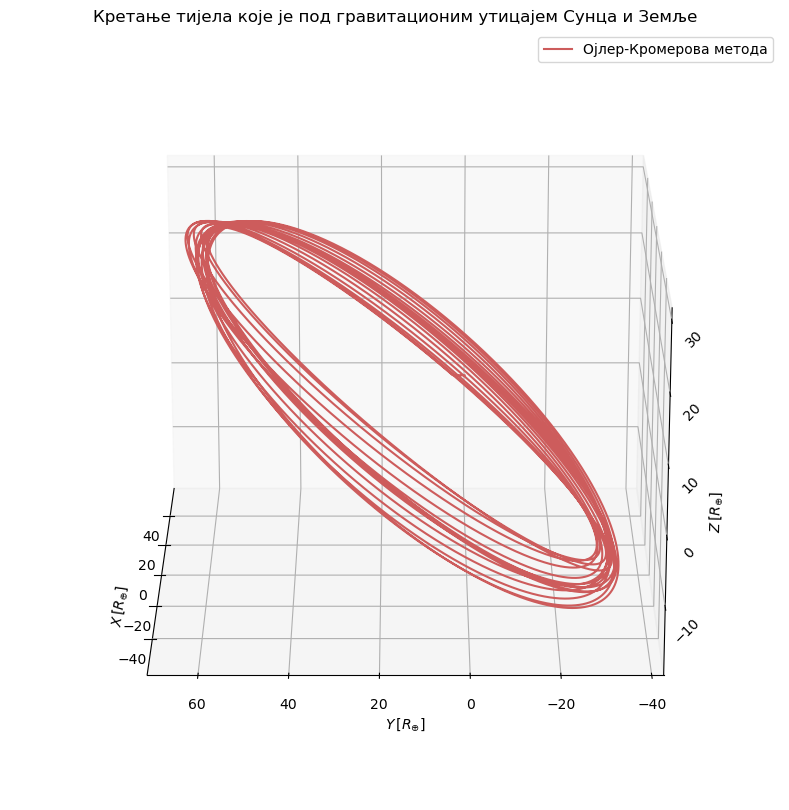

In [33]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d') 

ax.plot(x_gc/r0z, y_gc/r0z, z_gc/r0z, color='indianred', label='Ојлер-Кромерова метода')
ax.set_xlabel(r'$X\,[R_{\oplus}]$')
ax.set_ylabel(r'$Y\,[R_{\oplus}]$')
ax.set_zlabel(r'$Z\,[R_{\oplus}]$')

ax.view_init(elev=20, azim=180) 
ax.zaxis.set_tick_params(labelsize=10, labelrotation=45)
plt.tight_layout()
plt.title('Кретање тијела које је под гравитационим утицајем Сунца и Земље')
plt.legend()
plt.show()


#### $\color{magenta}{\text{Рунге-Кута метода.}} $ 

Рунге-Кута метода користи процјене промјене функције (извода) унутар једног корака како би се одредио идући положај.

Процјене се изводе на почетку, средини и крају временског корака, што омогућава високу прецизност.

$$
y(t+\Delta t)=y_{n+1}\approx y_n+\frac{1}{6}(K_1+2K_2+2K_3+K_4).
$$

Коефицијенти $K_i$ су заправо:

$$
K_1 = \Delta t \cdot f(t, y),
$$

$$
K_2 = \Delta t \cdot f\left(t + \frac{\Delta t}{2}, y + \frac{K_1}{2}\right),
$$

$$
K_3 = \Delta t \cdot f\left(t + \frac{\Delta t}{2}, y + \frac{K_2}{2}\right),
$$

$$
K_4 = \Delta t \cdot f(t + \Delta t, y + K_3).
$$

У нашем специфичном проблему фигуришу нам једначине:

$$
\ddot{x} = \frac{-\gamma M}{(x^2 + y^2 + z^2)^{3/2}} x, \quad \ddot{y} = \frac{-\gamma M}{(x^2 + y^2 + z^2)^{3/2}} y, \quad \ddot{z} = \frac{-\gamma M}{(x^2 + y^2 + z^2)^{3/2}} z,
$$


$$
x_{n+1} = x_n + \frac{1}{6}(K_{1(x)} + 2K_{2(x)} + 2K_{3(x)} + K_{4(x)}),
$$


$$
v_{x(n+1)} = v_{x(n)} + \frac{1}{6}(K_{1(vx)} + 2K_{2(vx)} + 2K_{3(vx)} + K_{4(vx)}).
$$

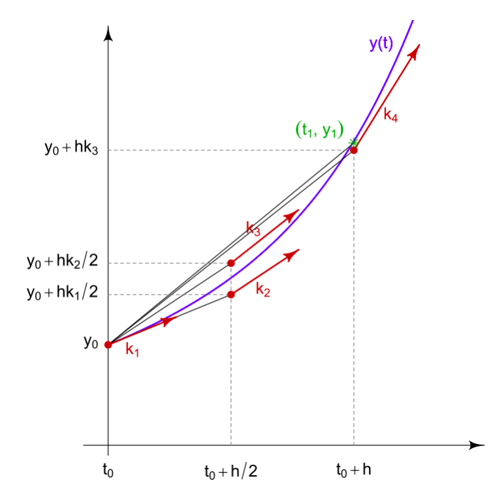

In [31]:
start = time.time()

x = au2m(1.) + 50 * r0z # почетни услови
y = 0
z = 0
vx = 0.25 * v0
vy = v_zemlja + v0
vz = 0.25 * v0

x_zemlja = au2m(1.)
y_zemlja = 0
z_zemlja = 0

sk = 2 * np.pi / year2second(1.)  # угаона брзина Земље

t = 0.  
dt = day2second(1/24/6)  

x_rk = [x - x_zemlja] 
y_rk = [y - y_zemlja]
z_rk = [z - z_zemlja]

vrijeme = [0]

while t < year2second(1): 

    # 1. корак
    ax, ay, az = ubrzanje_3tijela(x, y, z, x_zemlja, y_zemlja, z_zemlja, Ms, Mz, gama)
    Kx_1 = dt * vx
    Ky_1 = dt * vy
    Kz_1 = dt * vz
    Kvx_1 = dt * ax
    Kvy_1 = dt * ay
    Kvz_1 = dt * az

    # 2. корак
    ax, ay, az = ubrzanje_3tijela(x + Kx_1 / 2, y + Ky_1 / 2, z + Kz_1 / 2,
                                x_zemlja, y_zemlja, z_zemlja, Ms, Mz, gama)
    Kx_2 = dt * (vx + Kvx_1 / 2)
    Ky_2 = dt * (vy + Kvy_1 / 2)
    Kz_2 = dt * (vz + Kvz_1 / 2)
    Kvx_2 = dt * ax
    Kvy_2 = dt * ay
    Kvz_2 = dt * az

    # 3. корак
    ax, ay, az = ubrzanje_3tijela(x + Kx_2 / 2, y + Ky_2 / 2, z + Kz_2 / 2,
                                x_zemlja, y_zemlja, z_zemlja, Ms, Mz, gama)
    Kx_3 = dt * (vx + Kvx_2 / 2)
    Ky_3 = dt * (vy + Kvy_2 / 2)
    Kz_3 = dt * (vz + Kvz_2 / 2)
    Kvx_3 = dt * ax
    Kvy_3 = dt * ay
    Kvz_3 = dt * az

    # 4. корак
    ax, ay, az = ubrzanje_3tijela(x + Kx_3, y + Ky_3, z + Kz_3,
                                x_zemlja, y_zemlja, z_zemlja, Ms, Mz, gama)
    Kx_4 = dt * (vx + Kvx_3)
    Ky_4 = dt * (vy + Kvy_3)
    Kz_4 = dt * (vz + Kvz_3)
    Kvx_4 = dt * ax
    Kvy_4 = dt * ay
    Kvz_4 = dt * az

    # ажурирање позиција и брзина
    x += (Kx_1 + 2 * Kx_2 + 2 * Kx_3 + Kx_4) / 6
    y += (Ky_1 + 2 * Ky_2 + 2 * Ky_3 + Ky_4) / 6
    z += (Kz_1 + 2 * Kz_2 + 2 * Kz_3 + Kz_4) / 6
    vx += (Kvx_1 + 2 * Kvx_2 + 2 * Kvx_3 + Kvx_4) / 6
    vy += (Kvy_1 + 2 * Kvy_2 + 2 * Kvy_3 + Kvy_4) / 6
    vz += (Kvz_1 + 2 * Kvz_2 + 2 * Kvz_3 + Kvz_4) / 6

    # ажурирање положаја Земље
    t += dt
    x_zemlja = au2m(1.) * np.cos(sk * t)
    y_zemlja = au2m(1.) * np.sin(sk * t)

    x_rk.append(x - x_zemlja)
    y_rk.append(y - y_zemlja)
    z_rk.append(z - z_zemlja)
    vrijeme.append(t)
    
end = time.time()
print(f'Вријеме извршавања за Рунге-Кута методу: {end - start:.2f} s.')

Вријеме извршавања за Рунге-Кута методу: 1.55 s.


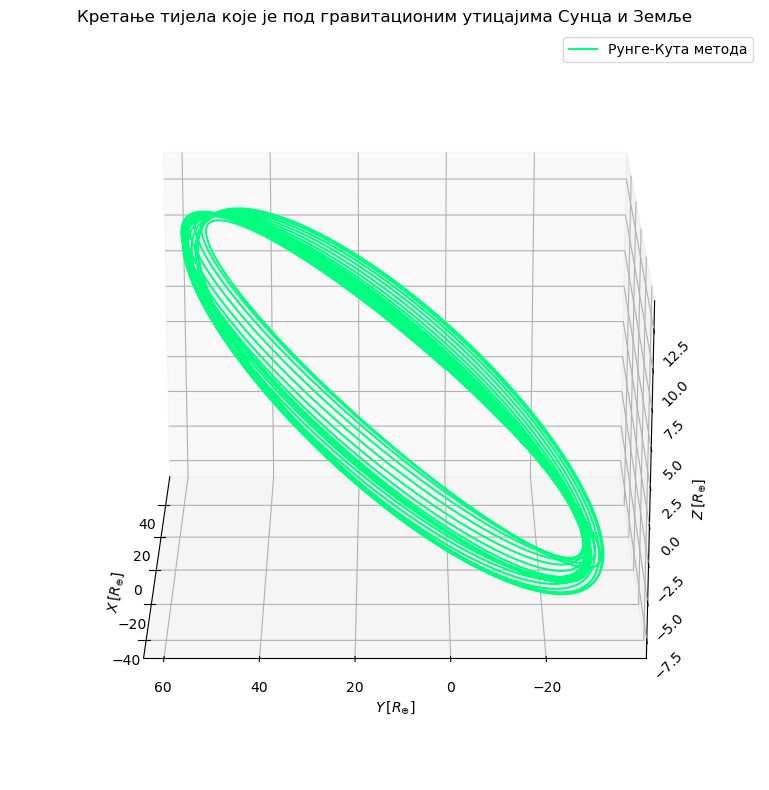

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d') 

ax.plot(np.array(x_rk)/r0z, np.array(y_rk)/r0z, np.array(z_rk)/r0z, color='springgreen',
        label='Рунге-Кута метода')

ax.view_init(elev=20, azim=180)  
ax.zaxis.set_tick_params(labelsize=10, labelrotation=45)
ax.set_xlabel(r'$X\,[R_{\oplus}]$')
ax.set_ylabel(r'$Y\,[R_{\oplus}]$')
ax.set_zlabel(r'$Z\,[R_{\oplus}]$')
plt.title('Кретање тијела које је под гравитационим утицајима Сунца и Земље')

plt.tight_layout()
plt.legend()
plt.show()

In [35]:
print('Ојлер-Кромер крајње координате:')
print(x_gc[-1], y_gc[-1], z_gc[-1])

print('Рунге-Кута крајње координате:')
print(x_rk[-1], y_rk[-1], z_rk[-1])

Ојлер-Кромер крајње координате:
-133432399.97052002 361824283.9072037 159299844.66646713
Рунге-Кута крајње координате:
-81137342.26855469 325190749.28519046 71949474.60508981


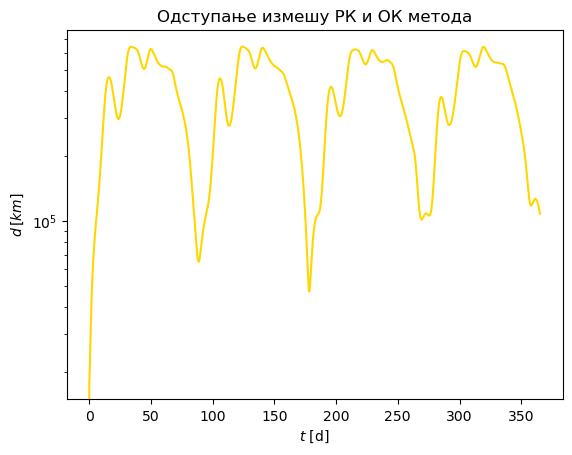

In [38]:
dx = np.array(x_rk) - x_gc
dy = np.array(y_rk) - y_gc
dz = np.array(z_rk) - z_gc

d = np.sqrt(dx**2 + dy**2 + dz**2)

plt.plot(second2day(np.array(vrijeme)), d/1000, color='gold')
plt.yscale('log') # лог. скала
plt.xlabel(r'$t$ [d]')
plt.ylabel(r'$d\,[km]$')
plt.title('Одступање измешу РК и ОК метода')
plt.show()